# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Student 1 - __[Ghita.Ait.Ouhmane@ulb.ac.be](mailto:Ghita.Ait.Ouhmane@ulb.ac.be) - Student ID 453422__
### Student 2 - __[Ha.Duong@ulb.ac.be](mailto:Ha.Duong@ulb.ac.be) - Student ID 463350__
### Student 3 - __[Maxime.Langlet@ulb.ac.be](mailto:Maxime.Langlet@ulb.ac.be) - Student ID 427821__

### Video presentation: www.youtube.com/abcd1234

## Statistical foundations of Machine Learning - Project 2020-2021


# Introduction


In [1]:
# install the packages and libraries
#install.packages("e1071")
#install.packages("tidyverse")
#install.packages("pillar")
#install.packages("caret")

#install.packages("drat", repos="https://cran.rstudio.com")
#drat:::addRepo("dmlc")
#install.packages("xgboost", repos="http://dmlc.ml/drat/", type = "source")

#install.packages("FactoMineR")
#install.packages("factoextra")


#install.packages("xgboost")
#install.packages("archdata")
#install.packages("caret") # for the confusionmatrix() function (also needs e1071 package)
#install.packages("dplyr") # for some data preperation
#install.packages("Ckmeans.1d.dp") # for xgb.ggplot.importance


library(rpart)
library(e1071)
library(rpart.plot)
library(randomForest)
library(nnet)
library(FactoMineR)
library(factoextra)
library("xgboost") # the main algorithm
library("archdata") # for the sample dataset
library("caret") # for the confusionmatrix() function (also needs e1071 package)
library("dplyr") # for some data preperation
library("Ckmeans.1d.dp") # for xgb.ggplot.importance

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: lattice


Attaching package: ‘dplyr’


The following object is masked from ‘package:xgboost’:

    slice


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'''date_recorded
num_private
funder
installer
wpt_name
subvillage
region? (code 27, region 21, why?)
lga
ward
recorded_by
scheme_name
payment
quantity
waterpoint_type_group'''

In [2]:
# read the datasets

sub_format <- read.csv("database/Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv", header=TRUE)
set_val_test <- read.csv("database/Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv", header=TRUE)
set_labels <- read.csv("database/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv", header=TRUE)
dataset <- read.csv("database/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv", header=TRUE)

# print the number of values of the Y
choices <- table(set_labels$status_group)
choices
# set_labels
# dim(set_labels)


             functional functional needs repair          non functional 
                  32259                    4317                   22824 

# Data preprocessing

## Missing value imputation




In [3]:
#On some distribution, when importing the dataset, some NA values are replaced by empty strings
#so we set them all tho NA
data1<-replace(dataset,dataset=='',NA)# Replaced to NA

#We then need to see whether there are NA values present in the dataset
#We can do that by removing them using na.omit and compare the dimension of the result with the input
dim(data1)
dim(na.omit(data1))


[1] 59400    40

[1] 27813    40

We can see that the number of rows decreased drastically, so we have to replace those NA values

## Feature selection
We now have to see which features will be kept, and which one introduce redundancy, or whose information aren't relevant to the problem.<br>

///this is just a draft<br>
Looking at the column types, we come accross two types of values : numerical and categorical. For the categorical values, a new encoding is required (like the one hot encoding for example) to obtain numerical values. However, the more unique values for a given columns, the more columns will be added to the dataset, so the features to keep have to take this into account.

In [4]:
head(data1)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,⋯,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,⋯,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,⋯,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,⋯,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,⋯,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,⋯,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,⋯,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


- The first feature we can look at is the date recorded. According to the description of the features, the row date_recorded corresponds to the date the row was entered. So it is not relevant at all to our probem. We can then remove it from the dataset.
- The next fetaure is num_private. There is no description of it vailable on the datadriven website, so we can try looking at the values it holds : 

In [5]:
#All the values of this column present in this dataset
unique(data1$num_private) 
#Frequency of each value
(table(data1$num_private))

[1]    0   39    5   45    6    3  698   32   15    7   25  102    1   93   14
[16]   34  120   17  213   47    8   41   80  141   20   35  131    4   22   11
[31]   87   61   65  136    2  180   38   62    9   16   23   42   24   12  668
[46]  672   58  150  280  160   50 1776   30   27   10   94   26  450  240  755
[61]   60  111  300   55 1402


    0     1     2     3     4     5     6     7     8     9    10    11    12 
58643    73    23    27    20    46    81    26    46     4     4    11     5 
   14    15    16    17    20    22    23    24    25    26    27    30    32 
    3    35     8    17    14     6     1     5    12     2     2     1    40 
   34    35    38    39    41    42    45    47    50    55    58    60    61 
   10     1     4    30    10     1    36    21     5     1     4     1     3 
   62    65    80    87    93    94   102   111   120   131   136   141   150 
    1    22    15     1    28     1    20     1     7     1     1     1     6 
  160   180   213   240   280   300   450   668   672   698   755  1402  1776 
    1     1     1     1     1     1     1     1     1     1     1     1     1 

We see that more than half the values are zero, which could suggest the value is just missing. Anyway, the values are not diversified enough so we remove that column from our dataset.

In [6]:
#All the values of this column present in this dataset
length(unique(data1$funder)) 
length(unique(data1$installer))
length(unique(data1$wpt_name)) 
length(unique(data1$subvillage)) 

[1] 1898

[1] 2146

[1] 37400

[1] 19288

- The funder feature is also categorical. Looking at the number of unique values, there are 1898. Encoding this using one hot is not a good idea since it will introduce too many new parameters and will probably have a huge impact on the speed and accuracy of our future models.
- The same observation can be made for the installer, wpt_name and subvillage features.
- We can look at the following features together : region, region_code, lga, district code and ward :

In [7]:
length(unique(data1$lga)) 
length(unique(data1$ward))

#All the values of this column present in this dataset
length(unique(data1$region)) 
#Frequency of each value
(table(data1$region))

#All the values of this column present in this dataset
length(unique(data1$region_code)) 
#Frequency of each value
(table(data1$region_code))

#All the values of this column present in this dataset
length(unique(data1$district_code)) 
#Frequency of each value
(table(data1$district_code))

[1] 125

[1] 2092

[1] 21


       Arusha Dar es Salaam        Dodoma        Iringa        Kagera 
         3350           805          2201          5294          3316 
       Kigoma   Kilimanjaro         Lindi       Manyara          Mara 
         2816          4379          1546          1583          1969 
        Mbeya      Morogoro        Mtwara        Mwanza         Pwani 
         4639          4006          1730          3102          2635 
        Rukwa        Ruvuma     Shinyanga       Singida        Tabora 
         1808          2640          4982          2093          1959 
        Tanga 
         2547 

[1] 27


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2201 3024 4379 2513 4040 1609  805  300  390 2640 5300 4639 2093 1979 1808 2816 
  17   18   19   20   21   24   40   60   80   90   99 
5011 3324 3047 1969 1583  326    1 1025 1238  917  423 

[1] 20


    0     1     2     3     4     5     6     7     8    13    23    30    33 
   23 12203 11173  9998  8999  4356  4074  3343  1043   391   293   995   874 
   43    53    60    62    63    67    80 
  505   745    63   109   195     6    12 

- We can right away remove features lga and ward, since they are both categorical and the number of unqiue valeus is very big.
- Distric code removed because proxy of region (justify more)
## what conclusion for the 3 others ? 

In [8]:
length(unique(data1$scheme_name)) 

[1] 2697

- For the scheme_name, we see that we have 2967 different categorical values, wo we will drop this feature too.
## why did me remove payment when only 7 values ? bc same var as payement_type

In [9]:
length(unique(data1$payment)) 
(table(data1$payment))

length(unique(data1$payment_type)) 
(table(data1$payment_type))

[1] 7


            never pay                 other          pay annually 
                25348                  1054                  3642 
          pay monthly        pay per bucket pay when scheme fails 
                 8300                  8985                  3914 
              unknown 
                 8157 

[1] 7


  annually    monthly  never pay on failure      other per bucket    unknown 
      3642       8300      25348       3914       1054       8985       8157 

In [10]:
length(unique(data1$quantity)) 
(table(data1$quantity))
length(unique(data1$quantity_group)) 
(table(data1$quantity_group))

length(unique(data1$waterpoint_type)) 
(table(data1$waterpoint_type))
length(unique(data1$waterpoint_type_group)) 
(table(data1$waterpoint_type_group))

length(unique(data1$recorded_by)) 
(table(data1$recorded_by))

[1] 5


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 

[1] 5


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 

[1] 7


              cattle trough          communal standpipe 
                        116                       28522 
communal standpipe multiple                         dam 
                       6103                           7 
                  hand pump             improved spring 
                      17488                         784 
                      other 
                       6380 

[1] 6


     cattle trough communal standpipe                dam          hand pump 
               116              34625                  7              17488 
   improved spring              other 
               784               6380 

[1] 1


GeoData Consultants Ltd 
                  59400 

- The two features quantity and quantity_group are identical, so we only need to keep one of them. We removed quantity
- For the fetaures waterpoint_type and waterpoint_type_group, we see that the values are similar expect for communal standpipe that is divided into "communal standpipe" and "communal standpipe multiplle" for the waterpoint_type feature. So we chose to keep this feature since it gives a little more variability to the data.
- Lookign at the recorded_by feature, we see that it only has one value which is "GeoData Consultants Ltd", so it doesn't bring any information to the dataset. It has been then removed.
- Removing id from the dataset, since the training dtaa and labels are both ordered in the same way

In [11]:
# Delete the columns in cleaning based on the variance, the relevance of the information, etc.
cleaning <- c("id","date_recorded", "num_private", "funder", "installer", "wpt_name", "subvillage", "lga", "ward", 
              "region_code", "scheme_name", "payment", "quantity", "waterpoint_type_group", "recorded_by", "district_code")
X<-dataset[,setdiff(colnames(dataset),cleaning)]
X<-replace(X,X=='',NA)#Replaced to NA
X

amount_tsh,gps_height,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,⋯,management,management_group,payment_type,water_quality,quality_group,quantity_group,source,source_type,source_class,waterpoint_type
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6000,1390,34.93809,-9.85632177,Lake Nyasa,Iringa,109,True,VWC,False,⋯,vwc,user-group,annually,soft,good,enough,spring,spring,groundwater,communal standpipe
0,1399,34.69877,-2.14746569,Lake Victoria,Mara,280,NA,Other,True,⋯,wug,user-group,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe
25,686,37.46066,-3.82132853,Pangani,Manyara,250,True,VWC,True,⋯,vwc,user-group,per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple
0,263,38.48616,-11.15529772,Ruvuma / Southern Coast,Mtwara,58,True,VWC,True,⋯,vwc,user-group,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple
0,0,31.13085,-1.82535885,Lake Victoria,Kagera,0,True,NA,True,⋯,other,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe
20,0,39.17280,-4.76558728,Pangani,Tanga,1,True,VWC,True,⋯,vwc,user-group,per bucket,salty,salty,enough,other,other,unknown,communal standpipe multiple
0,0,33.36241,-3.76636472,Internal,Shinyanga,0,True,VWC,True,⋯,vwc,user-group,never pay,soft,good,enough,machine dbh,borehole,groundwater,hand pump
0,0,32.62062,-4.22619802,Lake Tanganyika,Shinyanga,0,True,NA,True,⋯,wug,user-group,unknown,milky,milky,enough,shallow well,shallow well,groundwater,hand pump
0,0,32.71110,-5.14671181,Lake Tanganyika,Tabora,0,True,VWC,True,⋯,vwc,user-group,never pay,salty,salty,seasonal,machine dbh,borehole,groundwater,hand pump


We initially had 40 features. After removing the ones mentionned above, we are left with 25. 


## Feature engineering



Now that we have already removed some features, we can put the remainig ones in the correct format.<br>
For numerical values, we will replace all the NAs with the median value on that column.<br>
For categorical data, replace them with the most frequent value.

In [12]:
replace_na_with_median_value<-function(vec) {
    median_vec<-median(vec,na.rm=T)
    vec[is.na(vec)]<-median_vec
    vec
}

In [13]:
#distric code 0 ?? a demander
#population 0 -> mean ???
#public_meeting -> plus frequent
#scheme_management -> frequent
#permit -> plus frequent
#construction_year -> int(mean)
#dim(data.frame(X$permit))

#Replacing NA values in categorical features
table(X$permit)
X$permit[is.na(X$permit)] <- tail(names(sort(table(X$permit))), 1)
table(X$permit)

table(X$scheme_management)
X$scheme_management[is.na(X$scheme_management)] <- tail(names(sort(table(X$scheme_management))), 1)
table(X$scheme_management)

table(X$public_meeting)
X$public_meeting[is.na(X$public_meeting)] <- tail(names(sort(table(X$public_meeting))), 1)
table(X$public_meeting)


False  True 
17492 38852 


False  True 
17492 41908 


         Company             None            Other       Parastatal 
            1061                1              766             1680 
Private operator              SWC            Trust              VWC 
            1063               97               72            36793 
 Water authority      Water Board              WUA              WUG 
            3153             2748             2883             5206 


         Company             None            Other       Parastatal 
            1061                1              766             1680 
Private operator              SWC            Trust              VWC 
            1063               97               72            40670 
 Water authority      Water Board              WUA              WUG 
            3153             2748             2883             5206 


False  True 
 5055 51011 


False  True 
 5055 54345 

In [14]:
table(X$construction_year)


    0  1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971 
20709   102    21    30    85    40    19    17    88    77    59   411   145 
 1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  1984 
  708   184   676   437   414   202  1037   192   811   238   744   488   779 
 1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  1996  1997 
  945   434   302   521   316   954   324   640   608   738  1014   811   644 
 1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010 
  966   979  2091   540  1075  1286  1123  1011  1471  1587  2613  2533  2645 
 2011  2012  2013 
 1256  1084   176 

## note 20000 zeros

In [15]:
#For construction_year, some rows have a value 0, before replacing it , we first set 0 to NA so we can use is.na
X$construction_year[X$construction_year==0] <- NA
X$construction_year[is.na(X$construction_year)] <- median(X$construction_year,na.rm=T)
X$construction_year <- as.integer(X$construction_year)

In [16]:
#Same for longitude
X$longitude[X$longitude==0] <- NA
X$longitude[is.na(X$longitude)] <- median(X$longitude,na.rm=T)

X$latitude[X$latitude==-0.00000002] <- NA
X$latitude[is.na(X$latitude)] <- median(X$latitude,na.rm=T)
#sum(X$latitude==-0.00000002)

In [17]:
#For permit, the categorical values are bolleans true-false so we can encode them on only one column with 0 and 1, same goes
#for public meeting
X$permit[X$permit=='True'] <- 1
X$permit[X$permit=='False'] <- 0
X$permit <- as.integer(X$permit)

X$public_meeting[X$public_meeting=='True'] <- 1
X$public_meeting[X$public_meeting=='False'] <- 0
X$public_meeting <- as.integer(X$public_meeting)

In [18]:
summary(X)
X[1:20]

   amount_tsh         gps_height       longitude        latitude       
 Min.   :     0.0   Min.   : -90.0   Min.   :29.61   Min.   :-11.6494  
 1st Qu.:     0.0   1st Qu.:   0.0   1st Qu.:33.35   1st Qu.: -8.5406  
 Median :     0.0   Median : 369.0   Median :35.01   Median : -5.1727  
 Mean   :   317.7   Mean   : 668.3   Mean   :35.15   Mean   : -5.8638  
 3rd Qu.:    20.0   3rd Qu.:1319.2   3rd Qu.:37.18   3rd Qu.: -3.3982  
 Max.   :350000.0   Max.   :2770.0   Max.   :40.35   Max.   : -0.9985  
    basin              region            population      public_meeting  
 Length:59400       Length:59400       Min.   :    0.0   Min.   :0.0000  
 Class :character   Class :character   1st Qu.:    0.0   1st Qu.:1.0000  
 Mode  :character   Mode  :character   Median :   25.0   Median :1.0000  
                                       Mean   :  179.9   Mean   :0.9149  
                                       3rd Qu.:  215.0   3rd Qu.:1.0000  
                                       Max.   :30500

amount_tsh,gps_height,longitude,latitude,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment_type,water_quality,quality_group,quantity_group
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6000,1390,34.93809,-9.856322,Lake Nyasa,Iringa,109,1,VWC,0,1999,gravity,gravity,gravity,vwc,user-group,annually,soft,good,enough
0,1399,34.69877,-2.147466,Lake Victoria,Mara,280,1,Other,1,2010,gravity,gravity,gravity,wug,user-group,never pay,soft,good,insufficient
25,686,37.46066,-3.821329,Pangani,Manyara,250,1,VWC,1,2009,gravity,gravity,gravity,vwc,user-group,per bucket,soft,good,enough
0,263,38.48616,-11.155298,Ruvuma / Southern Coast,Mtwara,58,1,VWC,1,1986,submersible,submersible,submersible,vwc,user-group,never pay,soft,good,dry
0,0,31.13085,-1.825359,Lake Victoria,Kagera,0,1,VWC,1,2000,gravity,gravity,gravity,other,other,never pay,soft,good,seasonal
20,0,39.17280,-4.765587,Pangani,Tanga,1,1,VWC,1,2009,submersible,submersible,submersible,vwc,user-group,per bucket,salty,salty,enough
0,0,33.36241,-3.766365,Internal,Shinyanga,0,1,VWC,1,2000,swn 80,swn 80,handpump,vwc,user-group,never pay,soft,good,enough
0,0,32.62062,-4.226198,Lake Tanganyika,Shinyanga,0,1,VWC,1,2000,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,milky,milky,enough
0,0,32.71110,-5.146712,Lake Tanganyika,Tabora,0,1,VWC,1,2000,india mark ii,india mark ii,handpump,vwc,user-group,never pay,salty,salty,seasonal


In [19]:
names(X)

[1] "amount_tsh"            "gps_height"            "longitude"            
 [4] "latitude"              "basin"                 "region"               
 [7] "population"            "public_meeting"        "scheme_management"    
[10] "permit"                "construction_year"     "extraction_type"      
[13] "extraction_type_group" "extraction_type_class" "management"           
[16] "management_group"      "payment_type"          "water_quality"        
[19] "quality_group"         "quantity_group"        "source"               
[22] "source_type"           "source_class"          "waterpoint_type"

In [20]:
names(X)<-make.names(names(X))

In [21]:
#one hot conversion
#install.packages('dummies')
library(dummies)

#Now that all fetaures have the correct format, we can encode categorical variables into classes with values 0-1 using
#the one hot encoding
variables_to_keep<-names(X)
X_onehot <- dummy.data.frame(X[,variables_to_keep], sep="_")

dummies-1.5.6 provided by Decision Patterns


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 

In [22]:
#names(data_factor_onehot)
X_onehot

,amount_tsh,gps_height,longitude,latitude,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,⋯,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6000,1390,34.93809,-9.856322,0,1,0,0,0,0,⋯,1,0,0,0,1,0,0,0,0,0
2,0,1399,34.69877,-2.147466,0,0,0,0,1,0,⋯,0,1,0,0,1,0,0,0,0,0
3,25,686,37.46066,-3.821329,0,0,0,0,0,1,⋯,0,1,0,0,0,1,0,0,0,0
4,0,263,38.48616,-11.155298,0,0,0,0,0,0,⋯,1,0,0,0,0,1,0,0,0,0
5,0,0,31.13085,-1.825359,0,0,0,0,1,0,⋯,0,1,0,0,1,0,0,0,0,0
6,20,0,39.17280,-4.765587,0,0,0,0,0,1,⋯,0,0,1,0,0,1,0,0,0,0
7,0,0,33.36241,-3.766365,1,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
8,0,0,32.62062,-4.226198,0,0,0,1,0,0,⋯,1,0,0,0,0,0,0,1,0,0
9,0,0,32.71110,-5.146712,0,0,0,1,0,0,⋯,1,0,0,0,0,0,0,1,0,0


In [23]:
#vars <- c("id", "status_group") ##???
#labels_onehot <- dummy.data.frame(set_labels[,vars], sep="_")

#Renaming the encoded features in the labels dataframe
#names(labels_onehot)[names(labels_onehot) == "status_group_functional"] <- "functional"
#names(labels_onehot)[names(labels_onehot) == "status_group_functional needs repair"] <- "functional_needs_repair"
#names(labels_onehot)[names(labels_onehot) == "status_group_non functional"] <- "non_functional"
#labels_onehot

#set_labels$status_group[set_labels$status_group=='functional']<-0
#set_labels$status_group[set_labels$status_group=='functional needs repair']<-0.5
#set_labels$status_group[set_labels$status_group=='non functional']<-1

#set_labels$status_group <- as.double(set_labels$status_group)
#set_labels

In [24]:
#Y<-labels_onehot[,setdiff(colnames(labels_onehot),"id")]
Y<-set_labels[2]
Y[Y == "functional needs repair"] <- "functional_needs_repair"
Y[Y == "non functional"] <- "non_functional"
Y

status_group
<chr>
functional
functional
functional
non_functional
functional
functional
non_functional
non_functional
non_functional


In [57]:
names(X_onehot)<-make.names(names(X_onehot))#required to have concatenated names in order for randomForest to run
X_onehot

,amount_tsh,gps_height,longitude,latitude,basin_Internal,basin_Lake.Nyasa,basin_Lake.Rukwa,basin_Lake.Tanganyika,basin_Lake.Victoria,basin_Pangani,⋯,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle.trough,waterpoint_type_communal.standpipe,waterpoint_type_communal.standpipe.multiple,waterpoint_type_dam,waterpoint_type_hand.pump,waterpoint_type_improved.spring,waterpoint_type_other
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6000,1390,34.93809,-9.856322,0,1,0,0,0,0,⋯,1,0,0,0,1,0,0,0,0,0
2,0,1399,34.69877,-2.147466,0,0,0,0,1,0,⋯,0,1,0,0,1,0,0,0,0,0
3,25,686,37.46066,-3.821329,0,0,0,0,0,1,⋯,0,1,0,0,0,1,0,0,0,0
4,0,263,38.48616,-11.155298,0,0,0,0,0,0,⋯,1,0,0,0,0,1,0,0,0,0
5,0,0,31.13085,-1.825359,0,0,0,0,1,0,⋯,0,1,0,0,1,0,0,0,0,0
6,20,0,39.17280,-4.765587,0,0,0,0,0,1,⋯,0,0,1,0,0,1,0,0,0,0
7,0,0,33.36241,-3.766365,1,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
8,0,0,32.62062,-4.226198,0,0,0,1,0,0,⋯,1,0,0,0,0,0,0,1,0,0
9,0,0,32.71110,-5.146712,0,0,0,1,0,0,⋯,1,0,0,0,0,0,0,1,0,0


### PCA

The principal components of a dataset in a real coordinate space are a sequence of $p$ unit vectors where the i-th vector is the line that best fits the data while being orthogonal to the preceding vectors. In particular, the best fitting line minimises the average squared distance from the points to the line. PCA stands for Principal Component Analysis, it changes the basis on the data. In our case, we will use it as a data preparation technique to create a projection of a dataset prior to fitting a model and then reducing this projected data. 

To determine the what Principal Components to keep, we will look at the cumulative percentage of variance. The cumulative percentage of variance threshold of 90% was deemed reasonable. Hence, we will remove the principal components beyond this threshold. To that end we will use the \textit{prcomp} function in R. The cumulative percentage of variance can be retrieved and those steps will be detailed below. 


resources : https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/

https://en.wikipedia.org/wiki/Principal_component_analysis




In [26]:
X_pca <- prcomp(X_onehot, scale = TRUE)

In [27]:
# Print the cumulative percentage of variance for each columns

s <- summary(X_pca)
s$importance[3,]

PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9    PC10 
0.06629 0.10971 0.14506 0.17634 0.20477 0.23000 0.25264 0.27480 0.29614 0.31660 
   PC11    PC12    PC13    PC14    PC15    PC16    PC17    PC18    PC19    PC20 
0.33629 0.35554 0.37463 0.39303 0.41094 0.42833 0.44487 0.46056 0.47533 0.48957 
   PC21    PC22    PC23    PC24    PC25    PC26    PC27    PC28    PC29    PC30 
0.50366 0.51732 0.53076 0.54412 0.55716 0.57008 0.58277 0.59525 0.60732 0.61928 
   PC31    PC32    PC33    PC34    PC35    PC36    PC37    PC38    PC39    PC40 
0.63102 0.64267 0.65392 0.66493 0.67573 0.68612 0.69623 0.70559 0.71489 0.72385 
   PC41    PC42    PC43    PC44    PC45    PC46    PC47    PC48    PC49    PC50 
0.73226 0.74052 0.74850 0.75627 0.76370 0.77097 0.77801 0.78499 0.79186 0.79860 
   PC51    PC52    PC53    PC54    PC55    PC56    PC57    PC58    PC59    PC60 
0.80515 0.81161 0.81796 0.82430 0.83063 0.83693 0.84321 0.84940 0.85554 0.86162 
   PC61    PC62    PC63    PC64    PC65    PC66    PC67    PC68    PC69    PC70 
0.86755 0.87348 0.87930 0.88507 0.89060 0.89610 0.90145 0.90676 0.91194 0.91700 
   PC71    PC72    PC73    PC74    PC75    PC76    PC77    PC78    PC79    PC80 
0.92188 0.92653 0.93108 0.93549 0.93985 0.94400 0.94797 0.95180 0.95555 0.95926 
   PC81    PC82    PC83    PC84    PC85    PC86    PC87    PC88    PC89    PC90 
0.96284 0.96630 0.96946 0.97217 0.97483 0.97746 0.97996 0.98223 0.98431 0.98616 
   PC91    PC92    PC93    PC94    PC95    PC96    PC97    PC98    PC99   PC100 
0.98782 0.98933 0.99066 0.99187 0.99307 0.99419 0.99518 0.99599 0.99673 0.99745 
  PC101   PC102   PC103   PC104   PC105   PC106   PC107   PC108   PC109   PC110 
0.99809 0.99866 0.99912 0.99952 0.99976 0.99989 1.00000 1.00000 1.00000 1.00000 
  PC111   PC112   PC113   PC114   PC115   PC116   PC117   PC118   PC119   PC120 
1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 
  PC121   PC122   PC123   PC124   PC125   PC126   PC127   PC128   PC129   PC130 
1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 
  PC131   PC132   PC133   PC134   PC135   PC136   PC137   PC138   PC139   PC140 
1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 
  PC141   PC142   PC143   PC144   PC145   PC146   PC147   PC148   PC149   PC150 
1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 
  PC151   PC152   PC153   PC154   PC155   PC156   PC157   PC158 
1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000 1.00000

We can see that column PC67 covers already more than 90% of our initial database, hence we can remove 91 columns. This will help the training time taken for our models introduced in the next section. Furthermore, the trade-off should be that we lose a little bit in overall accuracy, this assumption will be tested in the following section.

In [28]:
X_final <- data.frame(X_pca$x[,1:67])
X_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.509680,1.76482484,2.8643866,-0.169960079,0.11097545,0.5401557,1.5801966,-0.12629029,0.60214467,-1.2469246,⋯,0.470651984,-0.416280174,0.123292329,-0.852476131,0.05232425,-0.595445316,0.32686012,1.00878049,-0.95789493,0.01040237
2,2.026263,1.00151558,-5.6517761,0.484466778,-0.80066532,2.4998269,1.4641406,-1.16904078,-1.39019263,1.8739211,⋯,0.447056391,0.236793268,-0.163708775,-0.385008087,0.98651081,1.133234510,0.25534785,0.94923599,-0.97359691,-1.03168222
3,2.649350,-1.46141778,-0.9083602,0.095090144,0.82743052,-0.2599366,-2.0060779,0.58060983,-1.75008103,3.2435282,⋯,-0.310816597,1.291704379,-0.450223470,0.180404413,1.46092545,0.857052084,-0.92890023,1.04067721,0.72715735,-0.68238250
4,-1.113864,-5.03607471,2.9246750,-0.140351544,1.15349060,-0.4558658,1.4996905,2.37894242,0.83613537,1.7441284,⋯,-0.666831417,-0.009120339,0.353086973,-0.066543752,0.01860899,0.010193542,0.59325417,0.18567926,-0.77743582,-0.72101262
5,2.382417,0.82512964,-6.7820846,1.560525670,-0.02657964,4.1538636,3.2932419,-0.44618450,-2.25976562,2.7725582,⋯,-0.095090379,0.511143946,0.450255467,-0.004639447,-0.48700635,-0.448173582,1.55874205,-0.58515938,0.61198825,-0.54848588
6,-1.426085,-5.92791454,1.0459846,3.505948610,-1.24869910,-6.0427553,-0.1053045,-7.37905370,6.03589865,9.0063239,⋯,-2.699244451,0.707015436,0.682542991,-1.209394355,3.22803025,-0.885162207,-0.09468789,-1.56132160,-0.89165784,-0.02469128
7,-3.024647,0.46162293,1.0238508,-2.043547659,0.09800503,1.6287489,0.1100828,0.54516335,0.33468775,0.5627727,⋯,0.017740146,-0.549409896,-0.230624612,-0.524278222,-0.94117835,-0.457964418,-0.14342650,0.60599972,-0.40057029,0.14200135
8,-5.953951,3.22937152,-1.8569914,0.282828401,-0.84011981,-1.6204150,-4.1085734,-1.47191513,0.98416788,-1.5095345,⋯,0.093910857,0.110807230,0.190618607,0.054831918,-0.44853129,-0.101655681,0.36884083,0.48245095,0.09471031,0.21385011
9,-4.492722,-1.29346014,1.5406462,-0.038722390,0.69201327,1.9622597,0.8480686,-2.87750267,0.15403545,4.0593625,⋯,-0.121653800,-0.828624514,0.052609907,-0.615247123,0.62952421,1.221244172,-0.23851832,-0.54119603,-0.49548254,1.93379365


In [29]:
N<-nrow(X_final)    #Number of examples
n<-ncol(X_final)    #Number of input variables

# Model selection

In this section, it is required to implement a model selection procedure. We must compare 3 different models and the procedure used for model assessment and selection. In particular, the first model evaluated was decision trees, coming from the rpart library.

Before diving into the presentation of our models, we define a function which transforms the output of 2 of our 3 models into a list with labels, rather than a "one-hot" output. This will help evaluating the accuracy of those models since a confusion matrix is used to that end. 

In [33]:
threshold <- 0.5

predict_transform <- function(Y_hat_tree){
    Y_hat <- t(apply(Y_hat_tree, 1, function(x)(x-min(x))/(max(x)-min(x))))
                 
    Y_hat[,1] <- ifelse(Y_hat[,1] < 0.99,0,1)
    Y_hat[,2] <- ifelse(Y_hat[,2] < 0.99,0,1)
    Y_hat[,3] <- ifelse(Y_hat[,3] < 0.99,0,1)
    Y_hat <- ifelse(Y_hat[,1] > threshold,"functional",ifelse(Y_hat[,2] > threshold,"functional_needs_repair","non_functional"))
    return(Y_hat)
}

## Model 1 - rpart

For all the models, to assess how the results of a statistical analysis will generalize to an independent data set, a 5-fold cross validation is used. In the next cell is the code for the 5-fold cross validation. In particular, this cell is using the CPA dataset (i.e. X_final). 

In [41]:
#cross validation or rpart pca as input, approximately 1 min to run

CV_folds <- 5

size_CV <-floor(N/CV_folds)


for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_final[idx_ts,]  
    Y_ts<-Y[idx_ts,]
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_final[idx_tr,]
    Y_tr<-Y[idx_tr,]         
        # Create a dataset including only the first nb_components principal components
    DS<-cbind(X_tr,status_group=Y_tr)
    DS$status_group<-factor(DS$status_group)
         
    #rpart
    tree<- rpart(status_group~.,data=DS, method='class')

    # Model predict
    Y_hat_tree<- predict(tree,X_ts)
    Y_hat <- predict_transform(Y_hat_tree)
    acc_rpart <- confusionMatrix(as.factor(Y_hat),as.factor(Y_ts))$overall['Accuracy']
    print(acc_rpart)
} 

Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Accuracy 
0.677862 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.6739899 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.6776094 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.6772727 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Accuracy 
0.685101 


In [ ]:
#saveRDS(model_one_hot, "rpart.rds")

In [ ]:
#tree <- readRDS("rpart.rds")
#Y_pred<-predict(tree,test_data)

Now let's compare if we feed the model with our non-PCA dataset. 

In [42]:
#cross validation or rpart, approximately 1 min 10s to run

CV_folds <- 5

size_CV <-floor(N/CV_folds)



for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_onehot[idx_ts,]  
    Y_ts<-Y[idx_ts,]
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_onehot[idx_tr,]
    Y_tr<-Y[idx_tr,]         
        # Create a dataset including only the first nb_components principal components
    DS<-cbind(X_tr,status_group=Y_tr)
    DS$status_group<-factor(DS$status_group)
         
    #rpart
    tree<- rpart(status_group~.,data=DS, method='class')

    # Model predict
    Y_hat_tree<- predict(tree,X_ts)
    Y_hat <- predict_transform(Y_hat_tree)
    acc_rpart <- confusionMatrix(as.factor(Y_hat),as.factor(Y_ts))$overall['Accuracy']
    print(acc_rpart)
} 

Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7069865 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7043771 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7047138 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7055556 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7128788 


It seems that rpart benefits from having a more complete dataset rather than a projection into principle components. Furthermore, the time gained from reducing our dataset is not that significant for this model. In conclusion, for the decision tree using rpart, it is preferable to use the original dataset. One interesting aspect of the training of this model is that it doesn't predict the class "functional_needs_repair. Let's show this with the last testing set of the preceding cross validation with the confusion matrix. 

In [46]:
confusionMatrix(as.factor(Y_hat),as.factor(Y_ts))$table

Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


                         Reference
Prediction                functional functional_needs_repair non_functional
  functional                    6227                     740           2327
  functional_needs_repair          0                       0              0
  non_functional                 244                     100           2242

This can be a consequence of the lack this particular class in the dataset, remember less than 10% of our labels constitute the class "functional_needs_repair". Maybe that, with a more balanced data-set this issue wouldn't be present. DO WE EVALUATE MORE OF THE MODEL IE BER SP AND SL ?

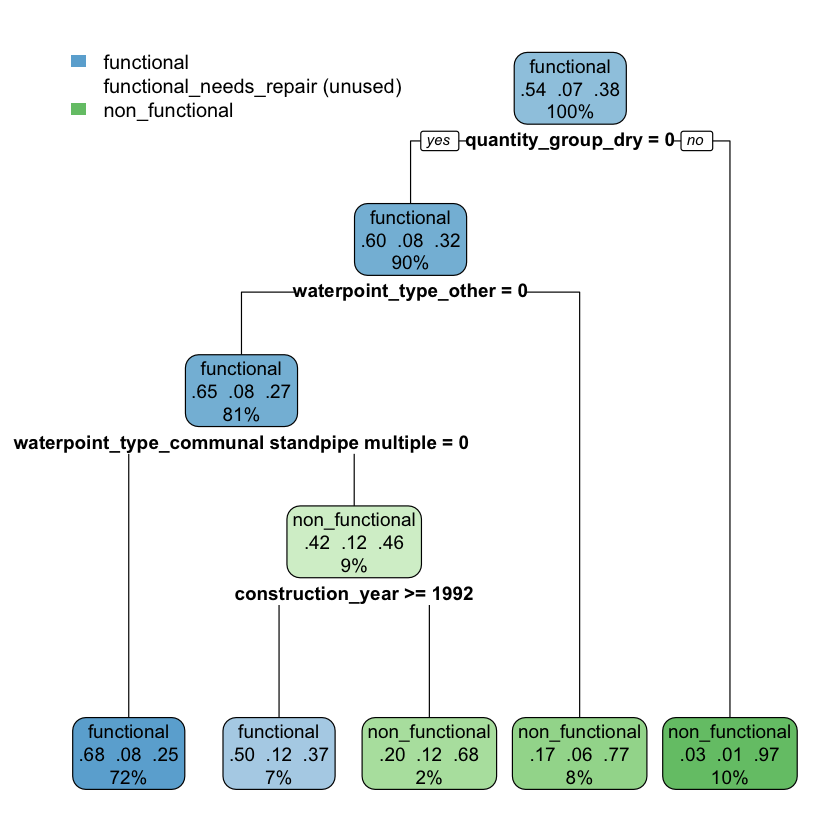

In [39]:
rpart.plot(tree) # where to put this ???

In [40]:
# plot tree
#plot(tree, uniform=TRUE,
#   main="Classification Tree - Rpart")
#text(tree, use.n=TRUE, all=TRUE, cex=.8)

## Model 2 - nnet

For the second model we decided to implement a neural network using the nnet library. Furthermore, the nnet function allows us to take the input labels as "one-hot" encoding. We will thus compare both methods, one taking a "one-hot" encoding a input labels and another taking the labels as before. Lastly, we will compare those results to a model trained on data without the PCA reduction.

The following cell shows the implementation of the nnet model with PCA data as input.

In [48]:
#nnet

#cross validation of nnet pca input, ~11 min mais peut etre une "erreur" ou bug

CV_folds <- 5

size_CV <-floor(N/CV_folds)




for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_final[idx_ts,]  
    Y_ts<-Y[idx_ts,]
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_final[idx_tr,]
    Y_tr<-Y[idx_tr,]         
        # Create a dataset including only the first nb_components principal components
    DS<-cbind(X_tr,status_group=Y_tr)
    DS$status_group<-factor(DS$status_group)

    # Model fit
    model<- nnet(status_group~.,data=DS, size=5, maxit=1000, MaxNWts=2000,trace=FALSE)#1000 max iterations ?

    # Model predict
    Y_hat_nnet<- predict(model,X_ts)
    Y_hat <- predict_transform(Y_hat_nnet)
    acc_nnet <- confusionMatrix(as.factor(Y_hat),as.factor(Y_ts))$overall['Accuracy']
    print(acc_nnet)
} 

Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7428451 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7425926 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7328283 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7373737 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Accuracy 
0.747138 


In [ ]:
saveRDS(model_one_hot, "nnet.rds")

In [ ]:
model <- readRDS("nnet.rds")
Y_pred<-predict(model,test_data)

Loading required package: usethis

SHA-1 hash of file is bf3c7b8ac910823b729e3ce73bb6ab5e6955ad3d

Loading required package: scales

Loading required package: reshape


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




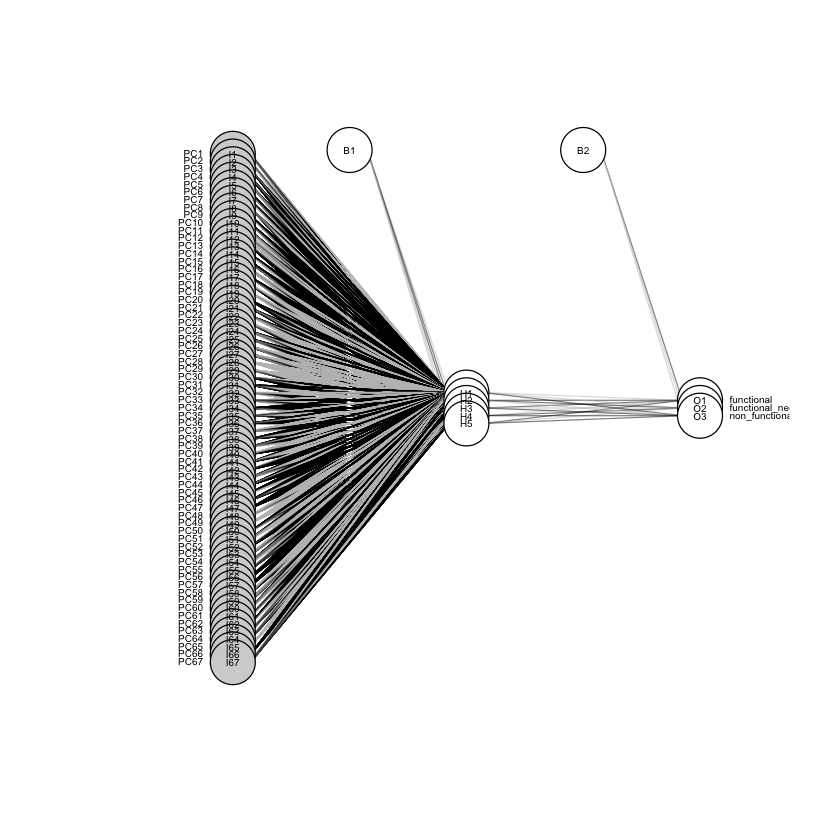

In [49]:
library(devtools)
source_url('https://gist.githubusercontent.com/Peque/41a9e20d6687f2f3108d/raw/85e14f3a292e126f1454864427e3a189c2fe33f3/nnet_plot_update.r')
plot.nnet(model, alpha.val = 0.5, circle.col = list('lightgray', 'white'), bord.col = 'black', cex=0.5)

### One hot as labels

In [50]:
#nnet one hot

#cross validation of nnet non one hot, ~2,5 min

CV_folds <- 5

size_CV <-floor(N/CV_folds)


for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_final[idx_ts,]  
    Y_ts<-Y[idx_ts,]
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_final[idx_tr,]
    Y_tr<-Y[idx_tr,]         
        # Create a dataset including only the first nb_components principal components
    DS<-cbind(X_tr,status_group=Y_tr)
    DS$status_group<-factor(DS$status_group)

    # Model fit (using lm function)
    model<- nnet(x=X_tr,y=class.ind(as.factor(Y_tr)), size=5, maxit=1000, MaxNWts=2000,trace=FALSE)#1000 max iterations ?

    # Model predict
    Y_hat_nnet<- predict(model,X_ts)
    Y_hat <- predict_transform(Y_hat_nnet)
    acc_nnet <- confusionMatrix(as.factor(Y_hat),as.factor(Y_ts))$overall['Accuracy']
    print(acc_nnet)
} 

Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Accuracy 
 0.54133 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7314815 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7455387 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7373737 


Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Accuracy 
0.544697 


In [51]:
#nnet

#cross validation of nnet non-pca, ~8 min

CV_folds <- 5

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=1,ncol=CV_folds)
threshold <- 0.5


for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_onehot[idx_ts,]  
    Y_ts<-Y[idx_ts,]
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_onehot[idx_tr,]
    Y_tr<-Y[idx_tr,]         
        # Create a dataset including only the first nb_components principal components
    DS<-cbind(X_tr,status_group=Y_tr)
    DS$status_group<-factor(DS$status_group)

    # Model fit (using lm function)
    model<- nnet(status_group~.,data=DS, size=5, maxit=1000, MaxNWts=2000,trace=FALSE)#1000 max iterations ?

    # Model predict
    Y_hat_nnet<- predict(model,X_ts)
    Y_hat <- predict_transform(Y_hat_nnet)
    acc_nnet <- confusionMatrix(as.factor(Y_hat),as.factor(Y_ts))$overall['Accuracy']
    print(acc_nnet)
} 

Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7330808 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7415825 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7343434 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7325758 


Warning message in levels(reference) != levels(data):
“la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court”
Warning message in confusionMatrix.default(as.factor(Y_hat), as.factor(Y_ts)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


 Accuracy 
0.7372054 


## Model 3 - Random Forest

The next model we'll evaluate is Breiman and Cutler's Random Forests for Classification and Regression, under the randomForest library. Firstly, we will estimate the number of trees yielding the best overall accuracy. We have to keep in mind that computational time is also a priority, so we'll decide the number of trees based on those two critierion. The next cell plots the accuracy per number of trees.

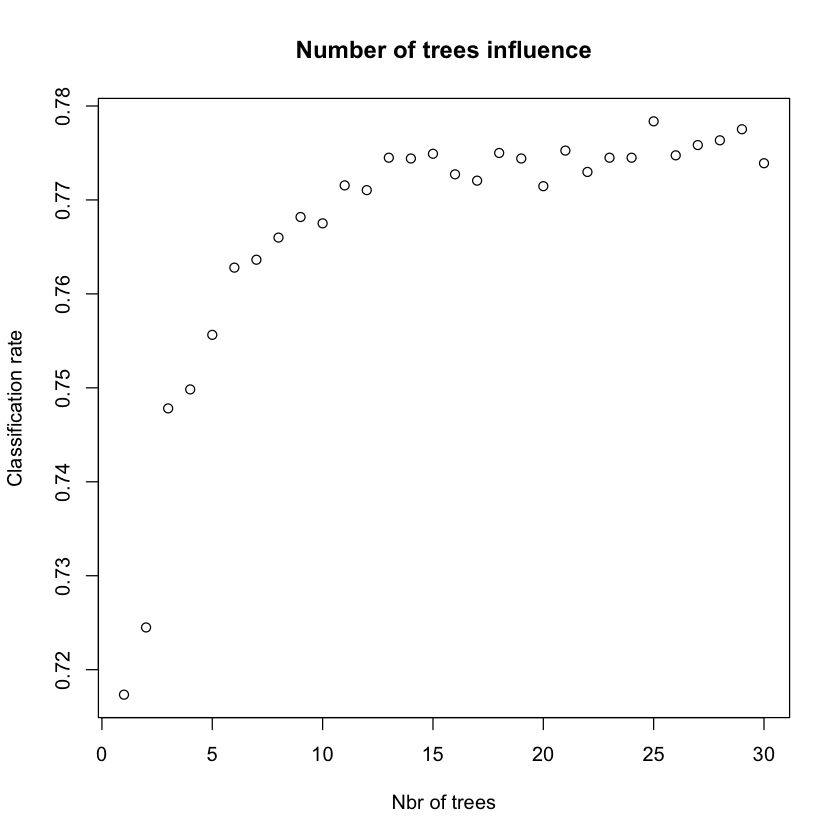

In [52]:
n_trees <- 30

accuracy_vec <- array(0,n_trees)

idx_ts<-((3*size_CV+1):(4*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
X_ts<-X_final[idx_ts,]  
Y_ts<-Y[idx_ts,]


idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
X_tr<-X_final[idx_tr,]
Y_tr<-Y[idx_tr,]         
    # Create a dataset including only the first nb_components principal components
DS<-cbind(X_tr,status_group=Y_tr)
DS$status_group<-factor(DS$status_group)

for (i in 1:n_trees){
    
    nb_trees <- randomForest(status_group~.,data=DS,
                          ntree=i)
    
    Y_hat_rf<- predict(nb_trees,X_ts)
    acc_forest <- confusionMatrix(as.factor(Y_hat_rf),as.factor(Y_ts))$overall['Accuracy']
    accuracy_vec[i] = acc_forest
    }

plot(accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate")

Looking at the global shape of the curve, it seems that a good number of trees could be around 15. That way we are close enough to the best accuray while gaining potentially a lot in computational time. 

The next cell applies the 5-fold cross validation on our randomForest, as input our PCA dataset. Note that the randomForest funciton returns labels, and not a "one-hot" probability encoding like the two preceding models, o the function predic_transform is not necessary in that case.

In [54]:
#cross validation of random forest pca input, ~11 min

CV_folds <- 5

size_CV <-floor(N/CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_final[idx_ts,]  
    Y_ts<-Y[idx_ts,]
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_final[idx_tr,]
    Y_tr<-Y[idx_tr,]         
        # Create a dataset including only the first nb_components principal components
    DS<-cbind(X_tr,status_group=Y_tr)
    DS$status_group<-factor(DS$status_group)
                     
    #randomForest
    forest<- randomForest(status_group~.,data=DS, ntrees=15)

    # Model predict
    Y_hat_rf<- predict(forest,X_ts)
    acc_forest <- confusionMatrix(as.factor(Y_hat_rf),as.factor(Y_ts))$overall['Accuracy']
    print(acc_forest)
} 

 Accuracy 
0.7833333 
 Accuracy 
0.7791246 
 Accuracy 
0.7826599 
 Accuracy 
0.7816498 
 Accuracy 
0.7824916 


In [58]:
#cross validation of random forest, ATTENTION BEFORE RUNNING ~24 min

CV_folds <- 5

size_CV <-floor(N/CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_onehot[idx_ts,]  
    Y_ts<-Y[idx_ts,]
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_onehot[idx_tr,]
    Y_tr<-Y[idx_tr,]         
        # Create a dataset including only the first nb_components principal components
    DS<-cbind(X_tr,status_group=Y_tr)
    DS$status_group<-factor(DS$status_group)
                     
    #randomForest
    forest<- randomForest(status_group~.,data=DS, ntrees=15)

    # Model predict
    Y_hat_rf<- predict(forest,X_ts)
    acc_forest <- confusionMatrix(as.factor(Y_hat_rf),as.factor(Y_ts))$overall['Accuracy']
    print(acc_forest)
} 

 Accuracy 
0.8004209 
 Accuracy 
0.7956229 
 Accuracy 
0.7991582 
 Accuracy 
0.7936027 
 Accuracy 
0.7968013 


In [ ]:
saveRDS(model_one_hot, "forest.rds")

In [ ]:
model <- readRDS("forest.rds")
Y_pred<-predict(model,test_data)

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|

# Alternative models





# Conclusions